In [2]:
import os

dataset_dir = 'bob-ross-dataset'

# Create a list of all paths to the images
image_paths = [os.path.join(dataset_dir, 'images', file) for file in os.listdir(dataset_dir+'/images')]
label_paths = [os.path.join(dataset_dir, 'labels', file) for file in os.listdir(dataset_dir+'/labels')]

/tmp/ipykernel_58/3074654764.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_paths[0])


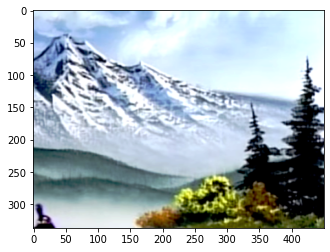

In [3]:
import imageio
import matplotlib.pyplot as plt

# Load the image file
img = imageio.imread(image_paths[0])

# Display the image
plt.imshow(img)
plt.show()

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
images = [imageio.imread(path) for path in image_paths if path.endswith('.png')]
labels = [imageio.imread(path) for path in label_paths if path.endswith('.png')]

images = np.array(images)
labels = np.array(labels)

/tmp/ipykernel_58/1893194078.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(path) for path in image_paths if path.endswith('.png')]
/tmp/ipykernel_58/1893194078.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  labels = [imageio.imread(path) for path in label_paths if path.endswith('.png')]


In [6]:
labels[0]

array([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       ...,
       [ 5,  5,  5, ..., 18, 18, 18],
       [ 5,  5,  5, ..., 18, 18, 18],
       [ 5,  5,  5, ..., 18, 18, 18]], dtype=uint8)

In [7]:
# Convert labels 3, 5, 10, 14, 17, 18, 22, 27, 61 into 0, 2, 3, 4, 5, 6, 7, 8
labels[labels == 3] = 0
labels[labels == 5] = 1
labels[labels == 10] = 2
labels[labels == 14] = 3
labels[labels == 17] = 4
labels[labels == 18] = 5
labels[labels == 22] = 6
labels[labels == 27] = 7
labels[labels == 61] = 8

In [8]:
labels[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5]], dtype=uint8)

In [9]:
labels.shape

(250, 337, 450)

In [10]:
# Find number of unique labels
len(np.unique(labels))

9

In [11]:
# labels = np.expand_dims(labels, axis=-1)
labels.shape

(250, 337, 450)

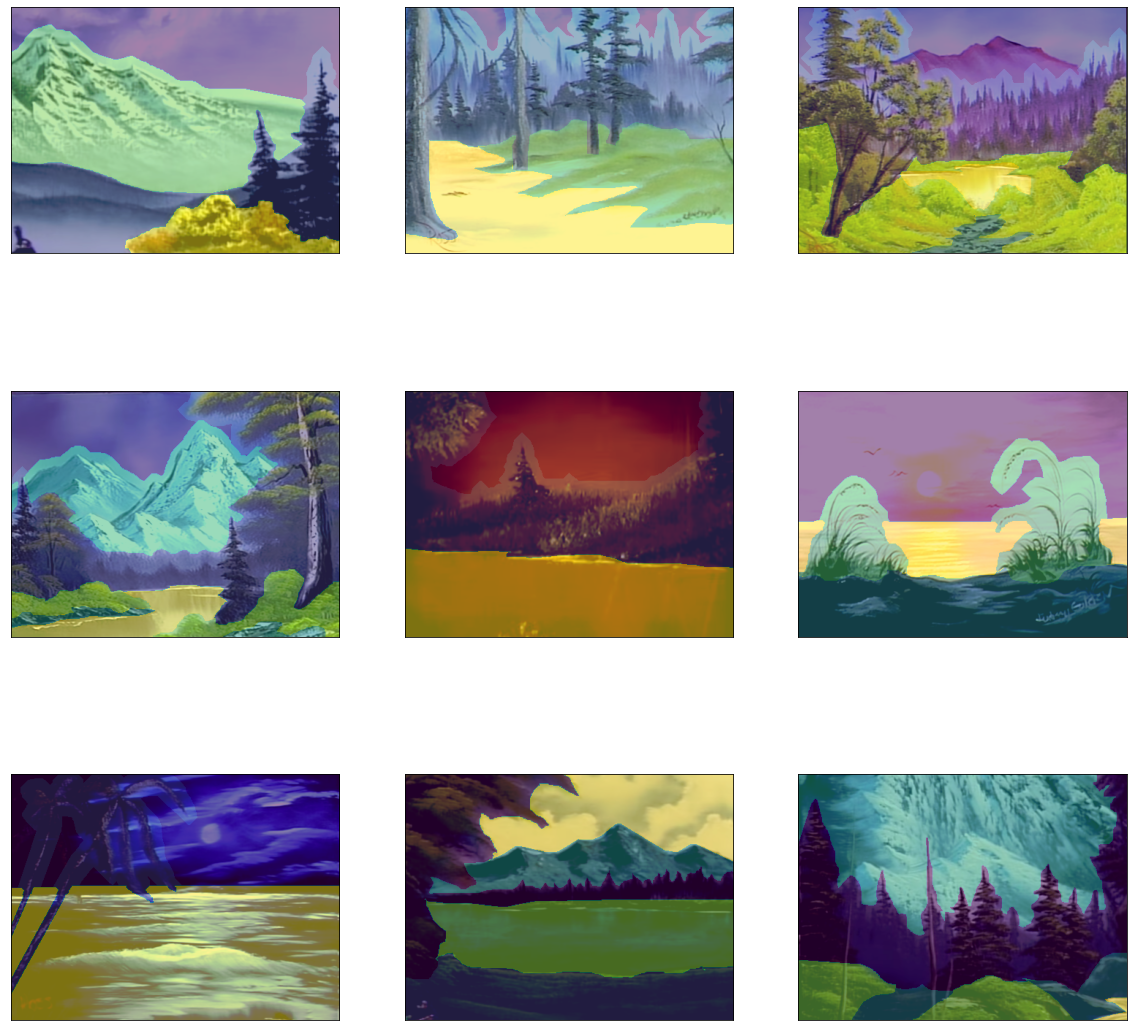

In [12]:
# plot 9 images and their labels overlapping
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i])
    axi.imshow(labels[i], alpha=0.5)
    axi.set(xticks=[], yticks=[])
plt.show()

In [13]:
import tensorflow as tf

# Define the class colors
class_colors = [
    [0, 0, 0],       # Class 0: Black
    [255, 0, 0],     # Class 1: Red
    [0, 255, 0],     # Class 2: Green
    [0, 0, 255],     # Class 3: Blue
    [255, 255, 0],   # Class 4: Yellow
    [255, 0, 255],   # Class 5: Purple
    [0, 255, 255],   # Class 6: Cyan
    [128, 0, 0],     # Class 7: Dark Red
    [0, 128, 0],     # Class 8: Dark Green
]

# Convert the segmentation image to one-hot encoding
one_hot_image = tf.one_hot(labels[0], depth=len(class_colors))

# Convert the one-hot encoding to an RGB image
rgb_image = tf.gather(class_colors, tf.argmax(one_hot_image, axis=-1))

# Convert the RGB image to uint8 type
rgb_image = tf.cast(rgb_image, tf.uint8)

In [14]:
rgb_image.shape

TensorShape([337, 450, 3])

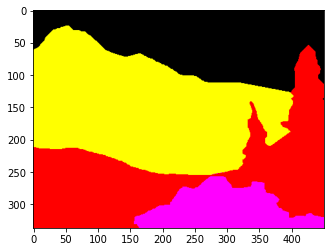

In [15]:
plt.imshow(rgb_image)
plt.show()

In [16]:
rgb_labels = []
for label in labels:
    one_hot_image = tf.one_hot(label, depth=len(class_colors))
    rgb_image = tf.gather(class_colors, tf.argmax(one_hot_image, axis=-1))
    rgb_image = tf.cast(rgb_image, tf.uint8)
    rgb_labels.append(rgb_image)

rgb_labels = np.array(rgb_labels)

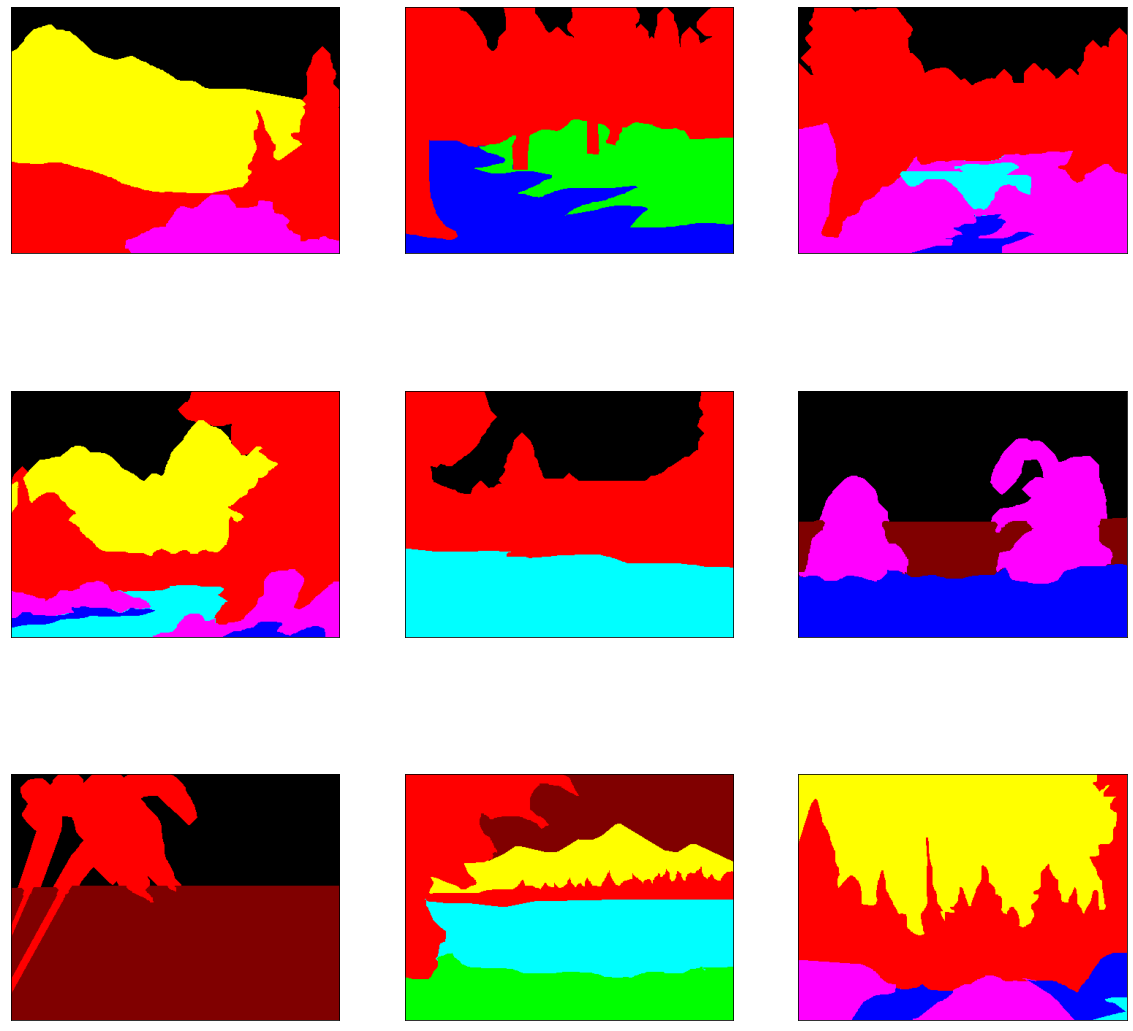

In [17]:
# plot 9 rgb labels
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(rgb_labels[i])
    axi.set(xticks=[], yticks=[])
plt.show()


In [18]:
len(np.unique(rgb_labels))

3

In [19]:
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [20]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):

  # Convert uint8 to float32
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [21]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [22]:
@tf.function()
def random_jitter(input_image, real_image):
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

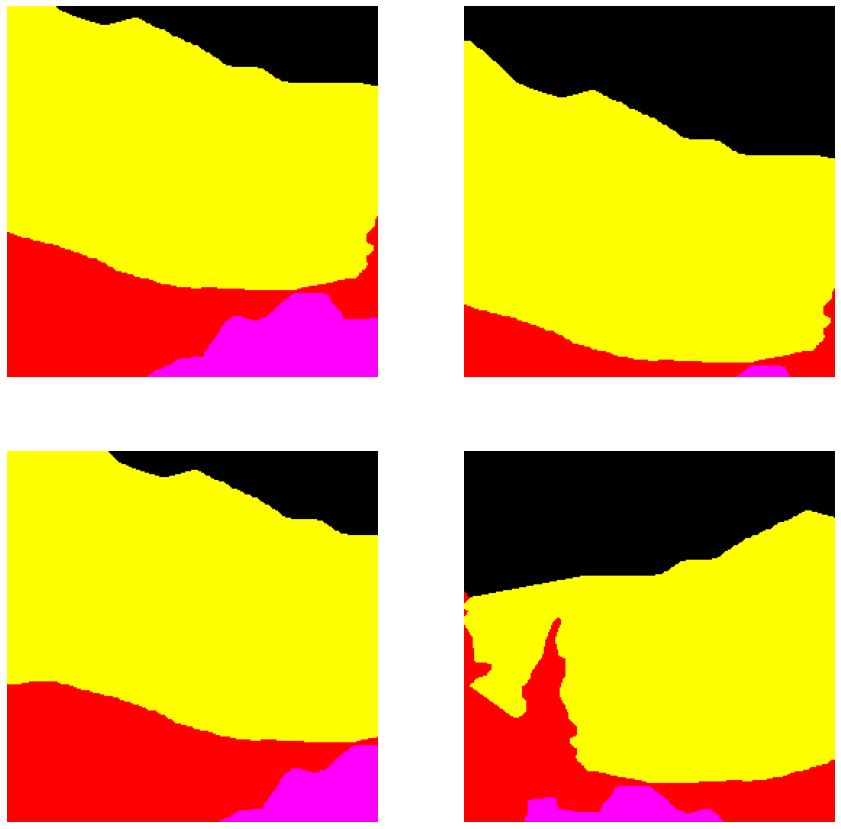

In [23]:
plt.figure(figsize=(15, 15))
for i in range(4):
  rj_inp, rj_re = random_jitter(rgb_labels[0], images[0])
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_inp)
  plt.axis('off')
plt.show()

In [24]:
TRAIN_SIZE = 230
TEST_SIZE = 20

BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [25]:
# Create a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((rgb_labels[:TRAIN_SIZE], images[:TRAIN_SIZE]))
train_dataset = train_dataset.map(lambda x, y: random_jitter(x, y))
train_dataset = train_dataset.batch(BATCH_SIZE)

In [26]:
# Create a tf.data.Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((rgb_labels[-TEST_SIZE:], images[-TEST_SIZE:]))
test_dataset = test_dataset.map(lambda x, y: random_jitter(x, y))
test_dataset = test_dataset.batch(BATCH_SIZE)

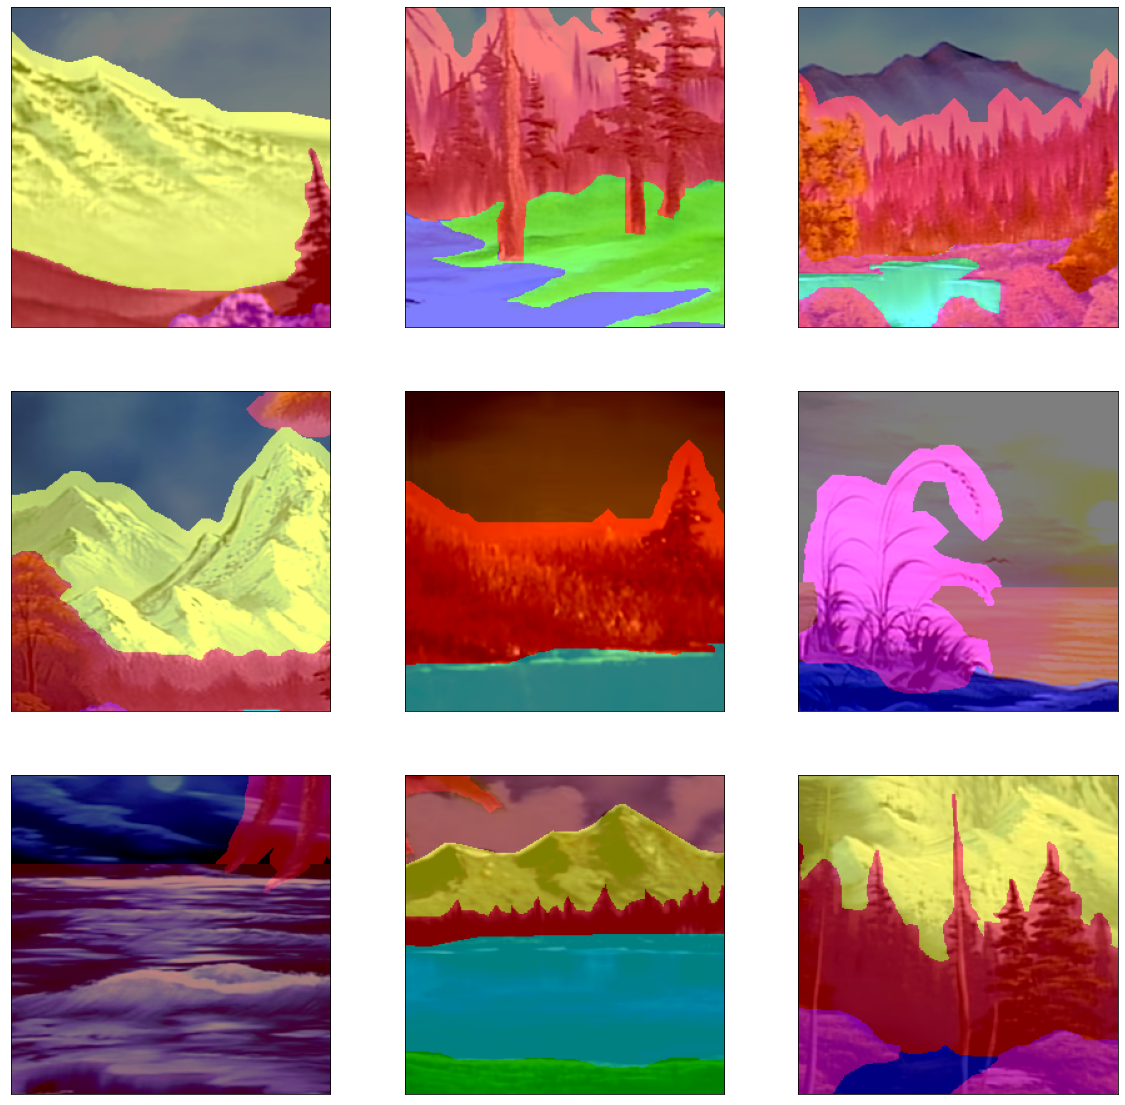

In [27]:
# Plot 9 images and their labels from the training dataset
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for image, label in train_dataset.take(1):
    for i, axi in enumerate(ax.flat):
        axi.imshow(image[i])
        axi.imshow(label[i], alpha=0.5)
        axi.set(xticks=[], yticks=[])

        in_label = label[i]
plt.show()

In [30]:
# Normalize the images with map and lambda
train_dataset = train_dataset.map(lambda x, y: normalize(x, y))
# Normalize the images with map and lambda
test_dataset = test_dataset.map(lambda x, y: normalize(x, y))

# Model

## Generator

In [28]:
OUTPUT_CHANNELS = 3

In [29]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [31]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [32]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [33]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


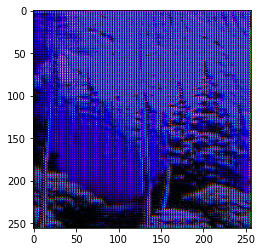

In [34]:
gen_output = generator(in_label[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [35]:
LAMBDA = 100

In [36]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [37]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [38]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [39]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


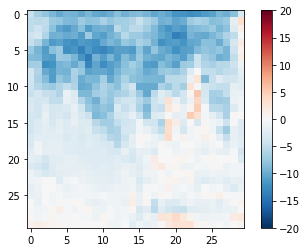

In [40]:
disc_out = discriminator([in_label[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [41]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [42]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [58]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [44]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

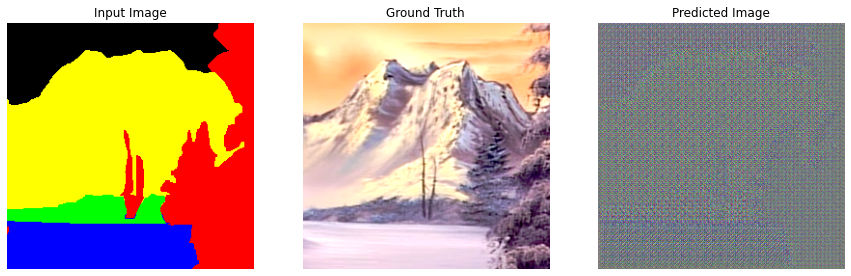

In [45]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

In [46]:
import datetime

In [47]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [48]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [49]:
import time
from IPython import display

In [50]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

Time taken for 1000 steps: 375.75 sec



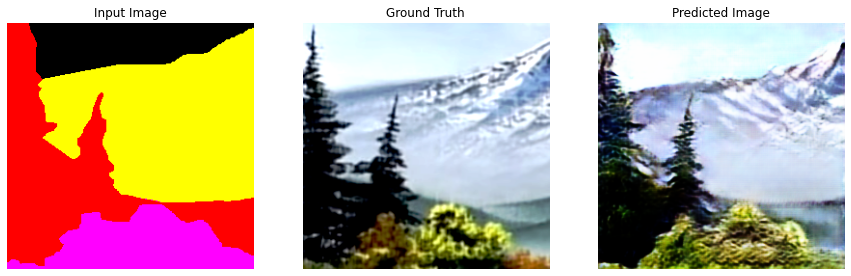

Step: 29k
....................................................................................................

In [52]:
fit(train_dataset, test_dataset, steps=30000)

In [130]:
display.IFrame(
    src="https://tensorboard.dev/experiment/FXYpA0vgT7OfOlQzTJandw/",
    width="100%",
    height="1000px")

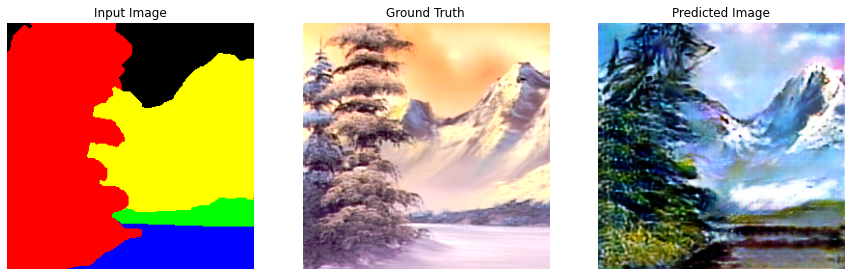

In [96]:
example_input, example_target = next(iter(test_dataset.take(1)))
generate_images(generator, example_input, example_target)

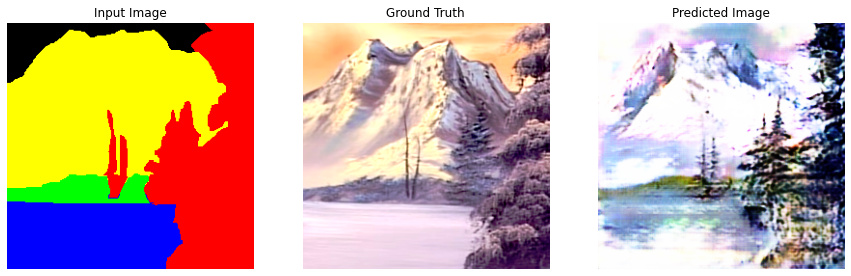

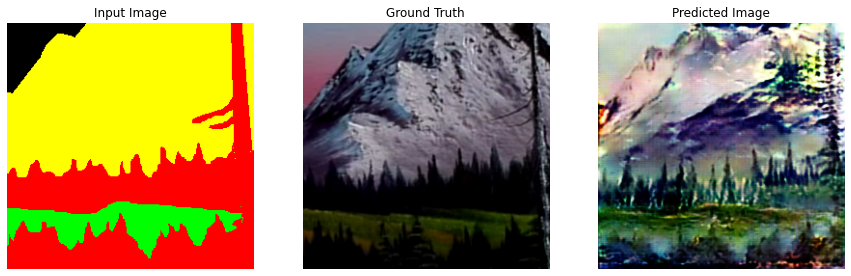

In [120]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)

## Load from checkpoint

In [55]:
ls {checkpoint_dir}

checkpoint                  ckpt-4.data-00000-of-00001
ckpt-1.data-00000-of-00001  ckpt-4.index
ckpt-1.index                ckpt-5.data-00000-of-00001
ckpt-2.data-00000-of-00001  ckpt-5.index
ckpt-2.index                ckpt-6.data-00000-of-00001
ckpt-3.data-00000-of-00001  ckpt-6.index
ckpt-3.index


In [59]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

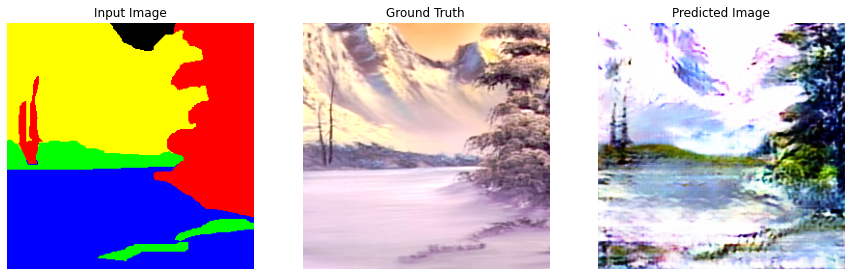

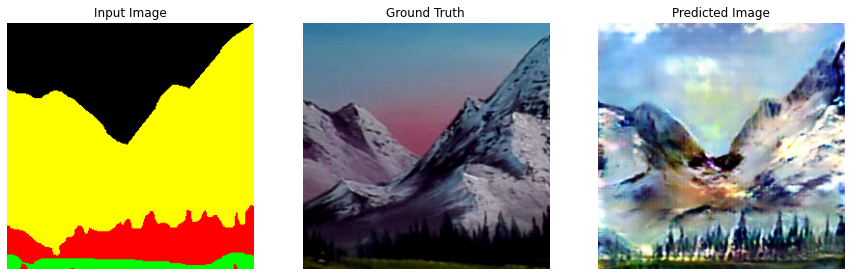

In [60]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)

In [71]:
from tensorflow.keras.utils import save_img

In [97]:
for inp, tar in test_dataset.take(5):
    input_masks = inp
    predictions = generator(inp, training=True)

In [99]:
for i in range(len(predictions)):
    save_img(f'./images/prediction_{i}.png', predictions[i])
    save_img(f'./images/input_mask_{i}.png', input_masks[i])